In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from google.cloud import storage
# from pictionary_ai.params import *
# from pictionary_ai.utils import *

In [5]:
# Parameters
max_length = 150
from_bucket_name = 'quickdraw-simplified-processed'
to_bucket_name = 'quickdraw-simplified-modelready'
test_split = 0.3

In [6]:
def list_blobs(bucket_name: str) -> list:
    '''
    Lists all the blobs in the bucket.
    '''
    # Initialize a client
    storage_client = storage.Client()

    # Get the bucket
    bucket = storage_client.bucket(bucket_name)

    # List the blobs in the bucket
    blobs = bucket.list_blobs()

    # Collect the names of blobs into a list
    blob_names = [blob.name for blob in blobs]

    return blob_names

In [7]:
blob_list = list_blobs(to_bucket_name)
print(len(blob_list))
blob_list

1323


['X_json.json',
 'test_10pc_The Eiffel Tower.ndjson',
 'test_10pc_The Great Wall of China.ndjson',
 'test_10pc_The Mona Lisa.ndjson',
 'test_10pc_aircraft carrier.ndjson',
 'test_10pc_airplane.ndjson',
 'test_10pc_alarm clock.ndjson',
 'test_10pc_ambulance.ndjson',
 'test_10pc_angel.ndjson',
 'test_10pc_animal migration.ndjson',
 'test_10pc_ant.ndjson',
 'test_10pc_anvil.ndjson',
 'test_10pc_apple.ndjson',
 'test_10pc_arm.ndjson',
 'test_10pc_asparagus.ndjson',
 'test_10pc_axe.ndjson',
 'test_10pc_backpack.ndjson',
 'test_10pc_banana.ndjson',
 'test_10pc_bandage.ndjson',
 'test_10pc_barn.ndjson',
 'test_10pc_baseball bat.ndjson',
 'test_10pc_baseball.ndjson',
 'test_10pc_basket.ndjson',
 'test_10pc_basketball.ndjson',
 'test_10pc_bat.ndjson',
 'test_10pc_bathtub.ndjson',
 'test_10pc_beach.ndjson',
 'test_10pc_bear.ndjson',
 'test_10pc_beard.ndjson',
 'test_10pc_bed.ndjson',
 'test_10pc_bee.ndjson',
 'test_10pc_belt.ndjson',
 'test_10pc_bench.ndjson',
 'test_10pc_bicycle.ndjson',
 'test

In [8]:
test_10_pc = [blob for blob in blob_list if blob.find('test_10pc') != -1]
len(test_10_pc)

345

In [9]:
train_10_pc = [blob for blob in blob_list if blob.find('train_10pc') != -1]
len(train_10_pc)

345

In [10]:
test = [blob for blob in blob_list if (blob.find('test_') != -1 and blob.find('test_10pc') == -1)]
len(test)

316

In [11]:
test = [blob for blob in blob_list if (blob.find('test_') != -1 and blob.find('test_10pc') == -1)]
len(test)

316

In [12]:
len(blob_list)

1323

In [13]:
345+345+249+249+2

1190

In [14]:
test

['test_The Eiffel Tower.ndjson',
 'test_The Great Wall of China.ndjson',
 'test_The Mona Lisa.ndjson',
 'test_aircraft carrier.ndjson',
 'test_airplane.ndjson',
 'test_alarm clock.ndjson',
 'test_ambulance.ndjson',
 'test_angel.ndjson',
 'test_animal migration.ndjson',
 'test_ant.ndjson',
 'test_anvil.ndjson',
 'test_apple.ndjson',
 'test_arm.ndjson',
 'test_asparagus.ndjson',
 'test_axe.ndjson',
 'test_backpack.ndjson',
 'test_banana.ndjson',
 'test_bandage.ndjson',
 'test_barn.ndjson',
 'test_baseball bat.ndjson',
 'test_baseball.ndjson',
 'test_basket.ndjson',
 'test_basketball.ndjson',
 'test_bat.ndjson',
 'test_bathtub.ndjson',
 'test_beach.ndjson',
 'test_bear.ndjson',
 'test_beard.ndjson',
 'test_bed.ndjson',
 'test_bee.ndjson',
 'test_belt.ndjson',
 'test_bench.ndjson',
 'test_bicycle.ndjson',
 'test_binoculars.ndjson',
 'test_bird.ndjson',
 'test_birthday cake.ndjson',
 'test_blackberry.ndjson',
 'test_blueberry.ndjson',
 'test_book.ndjson',
 'test_boomerang.ndjson',
 'test_bo

In [31]:
blob_list[1:5]

['test_10pc_The Eiffel Tower.ndjson',
 'test_10pc_The Great Wall of China.ndjson',
 'test_10pc_The Mona Lisa.ndjson',
 'test_10pc_aircraft carrier.ndjson']

In [42]:
import subprocess


def concatenate_files(bucket_name, source_objects, destination_object):
    # Create the gsutil command
    command = ['gsutil', 'compose'] + [f'gs://{bucket_name}/{obj}' for obj in source_objects] + [f'gs://{bucket_name}/{destination_object}']

    # Run the command
    subprocess.run(command, check=True)

# # Example usage
# if __name__ == "__main__":
#     bucket_name = 'your_bucket_name'
#     source_objects = ['file1.txt', 'file2.txt']  # List of files to concatenate
#     destination_object = 'concatenated.txt'  # Name of the concatenated file

#     concatenate_files(bucket_name, source_objects, destination_object)

In [39]:
[f'gs://{bucket_name}/{obj}' for obj in blob_list[1:5]]

['gs://your_bucket_name/test_10pc_The Eiffel Tower.ndjson',
 'gs://your_bucket_name/test_10pc_The Great Wall of China.ndjson',
 'gs://your_bucket_name/test_10pc_The Mona Lisa.ndjson',
 'gs://your_bucket_name/test_10pc_aircraft carrier.ndjson']

In [43]:
concatenate_files(to_bucket_name, blob_list[1:5], 'test_concat')

Composing gs://quickdraw-simplified-modelready/test_concat from 4 component object(s).


In [16]:
import json

# Download a blob from a bucket and store it in memory
def download_blob_to_memory(bucket_name, source_blob_name) -> list:
    '''
    Downloads a (ndjson) blob from the bucket and return json file as dict
    '''
    # Initialize a client
    storage_client = storage.Client()

    # Get the bucket
    bucket = storage_client.bucket(bucket_name)

    # Get the blob
    blob = bucket.blob(source_blob_name)

    # Download the blob content as a string
    blob_content = blob.download_as_string()

    # Need to replace all single quotes with double quotes for processed
    # Not need once processing code has been updated
    # blob_content = str(blob_content, encoding='utf-8').replace("'",'"')

    # Load JSON from the blob contents
    json_data = json.loads(blob_content)

    # Returns a list of dictionaries - each dictionary represents one drawing
    return json_data

In [19]:
xx = download_blob_to_memory(to_bucket_name, 'test_concat')

JSONDecodeError: Extra data: line 1 column 16958096 (char 16958095)

In [18]:
type(xx)

list

In [51]:
test_concat_blob = download_blob_to_memory(to_bucket_name, 'test_concat')

In [52]:
test_concat_blob[0:100]

b'[{"key_id": "5524890817921024", "class": "The Eiffel Tower", "length": 26, "list_deltas": [[0.0561, '

: 

# CHECKING SAMPLING RATES: 

In [1]:
!gsutil -m cp gs://quickdraw_dataset/full/raw/face.ndjson /home/raj/code/rs-uk/pictionary-ai/raw_data/face_raw.ndjson

Copying gs://quickdraw_dataset/full/raw/face.ndjson...
\ [1/1 files][565.6 MiB/565.6 MiB] 100% Done  17.4 MiB/s ETA 00:00:00           
Operation completed over 1 objects/565.6 MiB.                                    


In [2]:
!gsutil -m cp gs://quickdraw_dataset/full/simplified/face.ndjson /home/raj/code/rs-uk/pictionary-ai/raw_data/face_simplified.ndjson

Copying gs://quickdraw_dataset/full/simplified/face.ndjson...
- [1/1 files][ 89.4 MiB/ 89.4 MiB] 100% Done                                    
Operation completed over 1 objects/89.4 MiB.                                     


In [3]:
import ndjson

In [4]:
with open('/home/raj/code/rs-uk/pictionary-ai/raw_data/face_simplified.ndjson', 'r') as file :
    simplified_data = ndjson.load(file)


In [5]:
datum_simp = simplified_data[0]

In [6]:
with open('/home/raj/code/rs-uk/pictionary-ai/raw_data/face_raw.ndjson', 'r') as file :
    raw_data = ndjson.load(file)

In [54]:
datum_raw = raw_data[0]

In [53]:
import numpy as np

In [55]:
print(datum_raw['key_id'])
print(datum_simp['key_id'])

5152530285723648
5152530285723648


In [57]:
len(datum_raw['drawing'])

4

In [58]:
len(datum_simp['drawing'][0])

2

In [59]:
points = 0
for stroke in datum_raw['drawing'] :
    print(stroke)
    points += len(stroke[0])

points

[[318, 312, 306, 300, 294, 289, 283, 278, 270, 264, 260, 256, 254, 250, 247, 244, 242, 239, 237, 234, 232, 229, 227, 225, 223, 221, 220, 218, 216, 215, 214, 213, 211, 209, 208, 207, 206, 205, 203, 201, 201, 201, 201, 201, 201, 201, 201, 201, 202, 203, 205, 207, 210, 212, 215, 217, 220, 224, 227, 232, 235, 241, 247, 253, 259, 265, 271, 276, 282, 291, 298, 304, 310, 316, 321, 328, 336, 343, 349, 355, 363, 369, 374, 381, 389, 400, 407, 412, 420, 433, 438, 445, 453, 458, 469, 476, 481, 486, 494, 503, 508, 516, 525, 530, 538, 546, 554, 561, 569, 574, 580, 587, 595, 601, 607, 613, 618, 625, 632, 637, 648, 654, 659, 663, 666, 670, 674, 676, 678, 681, 684, 687, 690, 692, 695, 697, 700, 702, 702, 704, 704, 704, 704, 704, 704, 704, 704, 704, 703, 703, 701, 700, 697, 696, 693, 691, 688, 683, 680, 677, 674, 671, 666, 663, 657, 651, 645, 639, 632, 626, 620, 614, 609, 604, 595, 590, 585, 577, 569, 563, 558, 553, 548, 543, 535, 525, 520, 514, 509, 500, 494, 487, 478, 472, 465, 456, 450, 444, 435, 427

380

In [60]:
points = 0
for stroke in datum_simp['drawing'] :
    print(stroke)
    points += len(stroke[0])

points

[[59, 44, 28, 17, 8, 0, 0, 13, 32, 49, 85, 110, 136, 167, 189, 209, 229, 254, 254, 238, 222, 206, 181, 137, 86, 50, 38], [1, 5, 20, 42, 70, 109, 139, 169, 190, 201, 216, 221, 222, 222, 217, 209, 195, 144, 105, 66, 48, 37, 24, 8, 0, 0, 7]]
[[76, 76, 71, 59, 56, 56, 61, 72, 83, 89, 86, 79, 64, 56], [61, 67, 71, 70, 64, 55, 47, 45, 47, 68, 78, 80, 77, 63]]
[[176, 166, 146, 133, 130, 157, 192, 198, 196, 190, 177, 157, 139, 131, 129, 132], [82, 86, 85, 75, 64, 51, 50, 59, 78, 87, 95, 96, 90, 81, 72, 71]]
[[57, 68, 80, 110, 153, 202, 216, 228, 231], [168, 180, 185, 195, 200, 200, 195, 186, 179]]


66

In [61]:
380/66

5.757575757575758

In [62]:
len(raw_data)

161666

In [63]:
len(simplified_data)

161666

In [64]:
raw_points = 0

for datum in raw_data :
    for stroke in datum['drawing'] :
        raw_points += len(stroke[0])

raw_points

31747458

In [65]:
simple_points = 0

for datum in simplified_data :
    for stroke in datum['drawing'] :
        simple_points += len(stroke[0])

simple_points

9452737

In [66]:
raw_points / simple_points

3.3585466304626905

In [67]:
raw_points_list = []

for datum in raw_data :
    for stroke in datum['drawing'] :
        points = len(stroke[0])
    raw_points_list.append(points)

In [68]:
simple_points_list = []

for datum in simplified_data :
    for stroke in datum['drawing'] :
        points = len(stroke[0])
    simple_points_list.append(points)

In [69]:
print(len(raw_points_list))
print(len(simple_points_list))

161666
161666


In [70]:
simple_np = np.array(simple_points_list)
raw_np = np.array(raw_points_list)

In [73]:
ratio_list = raw_np / simple_np

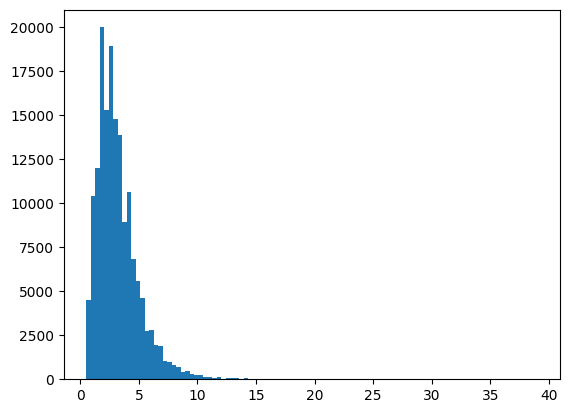

In [80]:
import matplotlib.pyplot as plt

plt.hist(ratio_list, bins=100);

In [87]:
import pandas as pd

pd.DataFrame(ratio_list).describe()

,0
count,161666.000000
mean,3.191825
std,1.852751
min,0.500000
25%,2.000000
50%,2.800000
75%,4.000000
max,39.000000
